In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML, Image, display
from matplotlib import animation

In [2]:
# set data path
data_path = pathlib.Path(
    "../../1.scDINO_run/outputdir/apoptosis_timelapse/CLS_features/CLS_features_annotated_umap.csv"
).resolve()

output_path = pathlib.Path("../figures/gifs/").resolve()
# create output path if it doesn't exist
output_path.mkdir(parents=True, exist_ok=True)

# load in the data
CLS_features_umap = pd.read_csv(data_path, index_col=0)
CLS_features_umap.head()

,Metadata_image_path,Metadata_Well,Metadata_FOV,Metadata_Time,Metadata_ImageNumber,Metadata_Nuclei_Number_Object_Number,Metadata_compound,Metadata_dose,Metadata_control,UMAP1,UMAP2
0,../../data/processed_images/crops/C-02/image_n...,C-02,1,10,10,10.0,Staurosporine,0.0,negative,0.336100,2.145964
1,../../data/processed_images/crops/C-02/image_n...,C-02,1,10,10,100.0,Staurosporine,0.0,negative,0.330319,5.186306
2,../../data/processed_images/crops/C-02/image_n...,C-02,1,10,10,101.0,Staurosporine,0.0,negative,-1.384449,2.012407
3,../../data/processed_images/crops/C-02/image_n...,C-02,1,10,10,102.0,Staurosporine,0.0,negative,1.602488,3.677288
4,../../data/processed_images/crops/C-02/image_n...,C-02,1,10,10,103.0,Staurosporine,0.0,negative,0.403058,3.174097


In [3]:
# set the unique wells
unique_doeses = CLS_features_umap["Metadata_dose"].unique()
unique_doeses

array([  0.  ,   0.61,   1.22,   2.44,   4.88,   9.77,  19.53,  39.06,
        78.13, 156.25])

In [4]:
# define an interval for the animation
# I want it to match 7 frames per second (fps)
# so I will set the interval to 1000/7
fps = 7
interval = 1000 / fps
print(f"Interval: {interval}")

Interval: 142.85714285714286


In [5]:
for dose in unique_doeses:
    fig, ax = plt.subplots(figsize=(6, 6))

    tmp_df = CLS_features_umap[CLS_features_umap["Metadata_dose"] == dose]
    classes = tmp_df["Metadata_Time"].unique()
    # split the data into n different dfs based on the classes
    dfs = [tmp_df[tmp_df["Metadata_Time"] == c] for c in classes]
    for i in range(len(dfs)):
        df = dfs[i]
        # split the data into the Metadata and the Features
        metadata_columns = df.columns[df.columns.str.contains("Metadata")]
        metadata_df = df[metadata_columns]
        features_df = df.drop(metadata_columns, axis=1)
        dfs[i] = features_df

    # plot the list of dfs and animate them
    ax.set_xlim(-5, 10)
    ax.set_ylim(-5, 15)
    scat = ax.scatter([], [], c="b", s=1)
    text = ax.text(-4, -4, "", ha="left", va="top")
    # add title
    ax.set_title(f"Staurosporine {dose} nM")
    # axis titles
    ax.set_xlabel("UMAP0")
    ax.set_ylabel("UMAP1")

    def animate(i):
        df = dfs[i]
        i = i * 30
        scat.set_offsets(df.values)
        text.set_text(f"{i} minutes.")
        return (scat,)

    anim = animation.FuncAnimation(
        fig, init_func=None, func=animate, frames=len(dfs), interval=interval
    )
    anim.save(f"{output_path}/Staurosporine_{dose}nM.gif", writer="imagemagick")

    plt.close(fig)

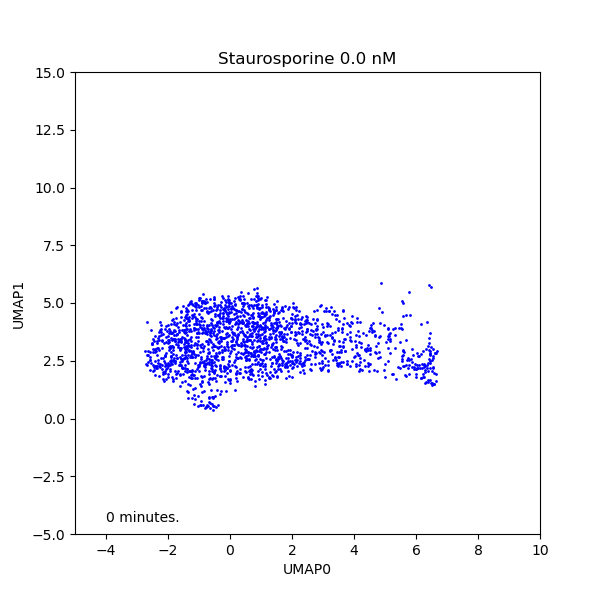

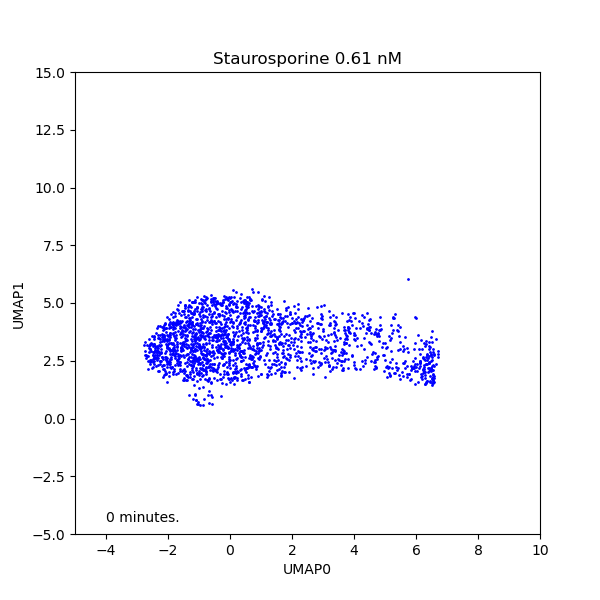

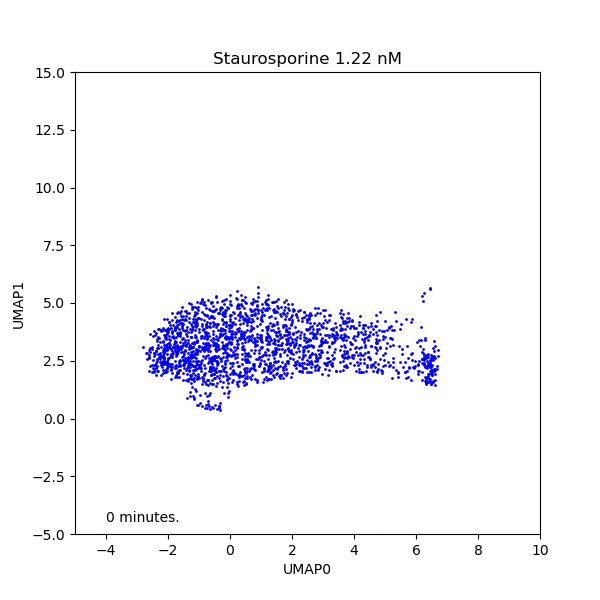

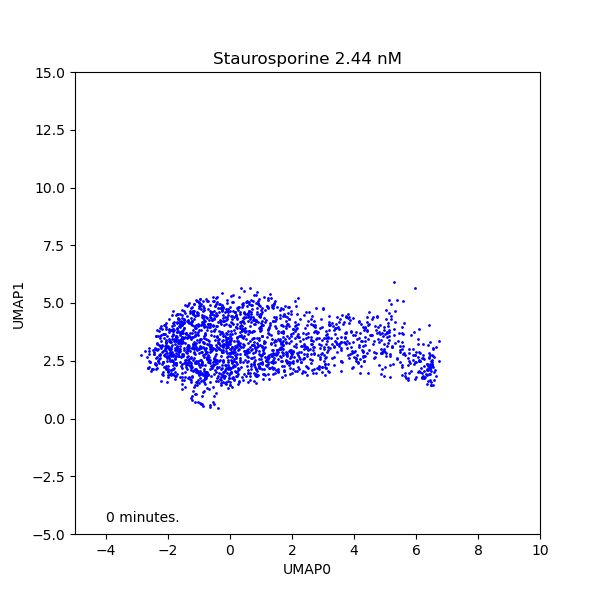

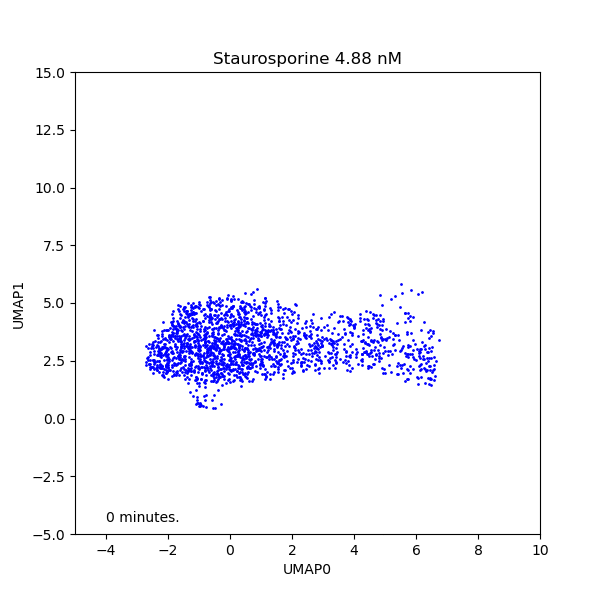

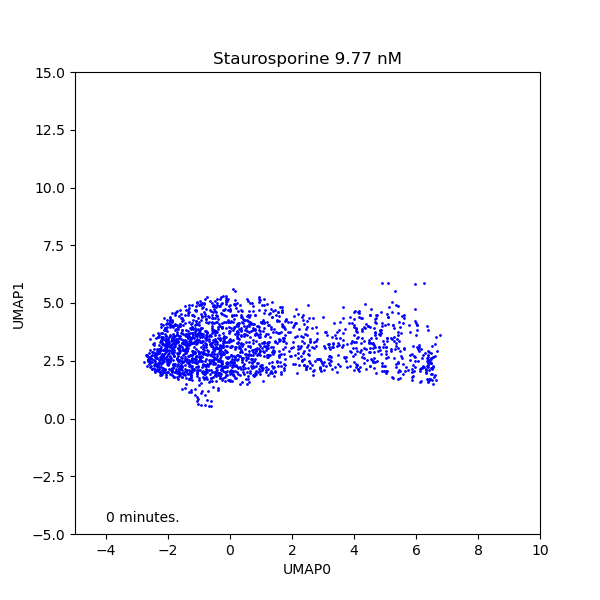

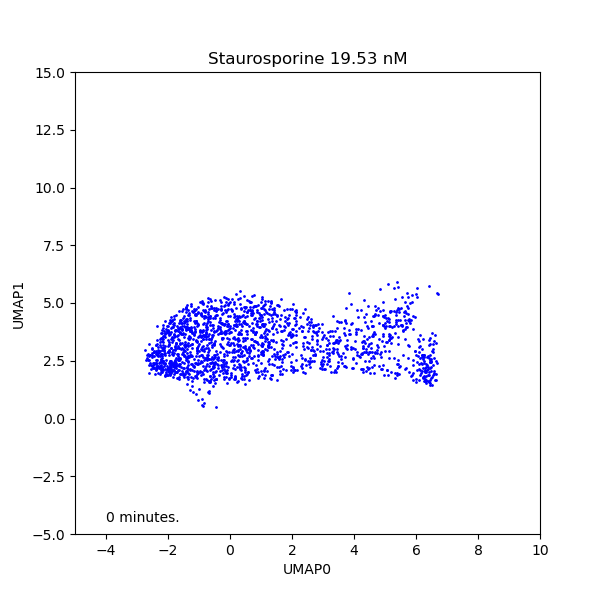

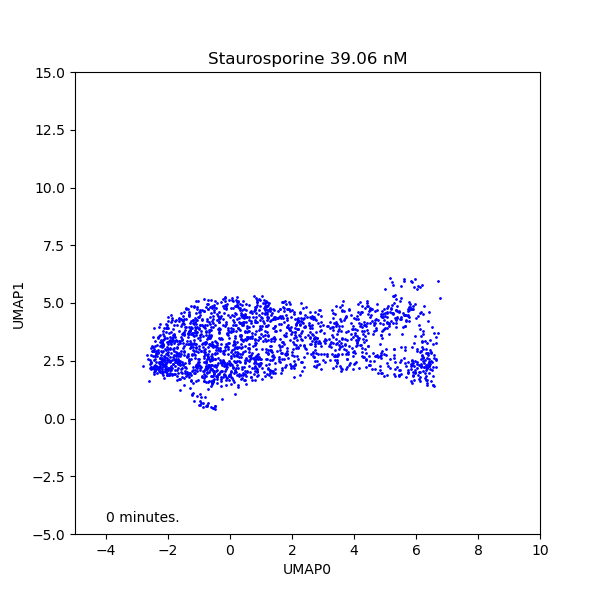

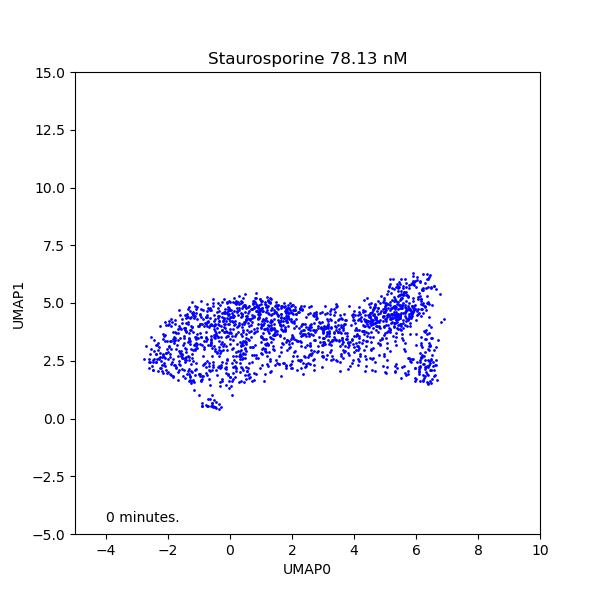

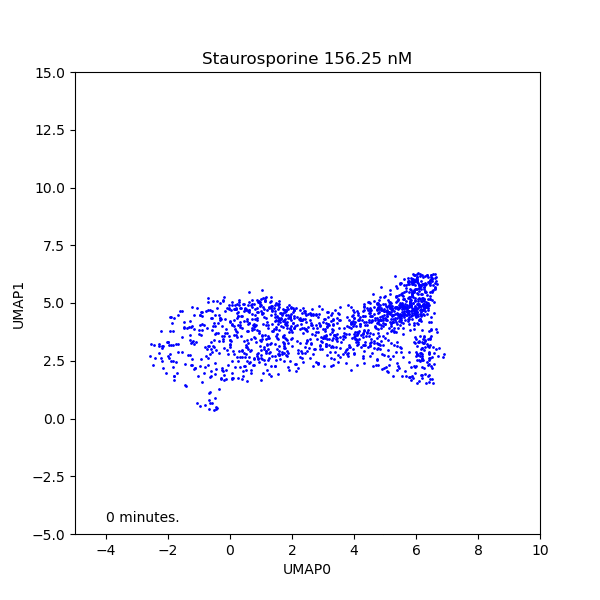

In [6]:
# Display the animations
for dose in unique_doeses:
    with open(f"{output_path}/Staurosporine_{dose}nM.gif", "rb") as f:
        display(Image(f.read()))